<a href="https://colab.research.google.com/github/Favour-Aransiola/drug-discovery/blob/main/drug_discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install chembl_webresource_client


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np


Seaching for Target Protein

In [3]:
target = new_client.target
target_query = target.search("coronavirus")
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
2,[],Murine coronavirus,Murine coronavirus,14.0,False,CHEMBL5209664,[],ORGANISM,694005
3,[],Canine coronavirus,Canine coronavirus,14.0,False,CHEMBL5291668,[],ORGANISM,11153
4,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
5,[],Human coronavirus OC43,Human coronavirus OC43,13.0,False,CHEMBL5209665,[],ORGANISM,31631
6,[],Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,694009
7,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
8,[],Severe acute respiratory syndrome-related coro...,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,694009
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


Select and retrieve Bioactivity data for SARS coronavirus 3C-like proteinase

In [4]:
selected_target = targets.target_chembl_id[6]
selected_target

'CHEMBL3927'

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type = 'IC50')

In [7]:
df = pd.DataFrame.from_dict(res)
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,2.0


Saving the Bioactivity Data to CSV

In [8]:
df.to_csv('bioactivity_data.csv',index=False)

Handle Missing Data
Columns with missing standard value are dropped

In [9]:
complete_data= df[df['standard_value'].notna()]
complete_data

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25516041,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5336133,Inhibition of SARS-CoV N-terminal 6His-SUMO-ta...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,pIC50,None,UO_0000065,None,6.42
243,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25516042,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5336133,Inhibition of SARS-CoV N-terminal 6His-SUMO-ta...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,0.165
244,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25516043,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5336133,Inhibition of SARS-CoV N-terminal 6His-SUMO-ta...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,0.161
245,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25516044,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5336133,Inhibition of SARS-CoV N-terminal 6His-SUMO-ta...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,pIC50,None,UO_0000065,None,6.78


I will label the compounds based on their standard value which determines their bioactivity in IC50. Compounds with standard value <= 1000nM are considered active, standard value>= 10000nM are considered inactive while 1000 < standard_value < 10000nM is considered intermidiate.

In [10]:
df['standard_value'] =df['standard_value'].astype(float)

dd2=df['standard_value'].to_numpy()

df['bioactivity_class'] = np.where(dd2<=1000,'active', np.where((dd2>1000) & (dd2<10000),'intermidiate','inactive'))

In [ ]:
df.bioactivity_class

,bioactivity_class
0,intermidiate
1,intermidiate
2,inactive
3,inactive
4,intermidiate
...,...
242,active
243,active
244,active
245,active


In [11]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value','bioactivity_class']

preprocessed_data = df[selection]


In [12]:
preprocessed_data

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.00,intermidiate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.00,intermidiate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.00,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.00,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.00,intermidiate
...,...,...,...,...
242,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,380.19,active
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.00,active
244,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,161.00,active
245,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.96,active


In [13]:
preprocessed_data.to_csv("bioactivity_preprocessed_data.scv",index=False)

In [14]:
pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.3/33.3 MB 51.2 MB/s eta 0:00:00


In [15]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski


In [16]:
def lipinski(smiles, verbose=False):
  mol_data =[]
  for elem in smiles:
    mol_data.append(Chem.MolFromSmiles(elem))
  base_data = np.arange(1,1)

  i=0
  for mol in mol_data:

    desc_MolWt = Descriptors.MolWt(mol)
    desc_MolLogP = Descriptors.MolLogP(mol)
    desc_NumHDonors= Descriptors.NumHDonors(mol)
    desc_NumHAcceptors = Descriptors.NumHAcceptors(mol)

    row = np.array([desc_MolWt,desc_MolLogP,desc_NumHDonors,desc_NumHAcceptors])

    if(i==0):
      base_data = row
    else:
      base_data = np.vstack([base_data,row])
    i+=1

  return pd.DataFrame(base_data,columns=['MW', 'LogP','NumHDonors','NumHAcceptors'])

In [17]:
df_lipinski = lipinski(df.canonical_smiles)

In [18]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
242,328.466,3.34562,1.0,5.0
243,222.379,-1.99300,1.0,3.0
244,485.559,0.54470,5.0,7.0
245,222.379,-1.99300,1.0,3.0


We combine the two DFs together

In [19]:
combined_df = pd.concat([preprocessed_data,df_lipinski], axis=1)
combined_df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.00,intermidiate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.00,intermidiate,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.00,inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.00,inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.00,intermidiate,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
242,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,380.19,active,328.466,3.34562,1.0,5.0
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.00,active,222.379,-1.99300,1.0,3.0
244,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,161.00,active,485.559,0.54470,5.0,7.0
245,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.96,active,222.379,-1.99300,1.0,3.0


Convert from IC50 to pIC50 to standardize the uneven distribution of the datapoints

In [20]:
def pIC50(input):
  pIC50 =[]
  for i in input['standard_value_norm']:
    molar = i* (10**-9) #converts nM to M
    pIC50.append(-np.log(molar))
  input['pIC50'] =pIC50
  x= input.drop('standard_value_norm',axis=1)
  return x;

In [21]:
combined_df.standard_value.describe()

,standard_value
count,2.450000e+02
mean,6.893878e+04
std,1.851962e+05
min,5.000000e+01
25%,5.000000e+03
50%,1.500000e+04
75%,4.700000e+04
max,2.000000e+06


Values above 100,000,000 will be fixed at 100,000,000 to prevent the negative logarithim value to turn negative

In [22]:
def norm_value(input):
  norm =[]
  for i in input['standard_value']:
    if i>100000000:
      i= 100000000
    norm.append(i)
  input['standard_value_norm'] =norm
  x= input.drop('standard_value',axis= 1)

  return x;


In [23]:
df_norm = norm_value(combined_df)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermidiate,281.271,1.89262,0.0,5.0,7200.00
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermidiate,415.589,3.81320,0.0,2.0,9400.00
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,13500.00
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,13110.00
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermidiate,338.344,3.53900,0.0,5.0,2000.00
...,...,...,...,...,...,...,...,...
242,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,active,328.466,3.34562,1.0,5.0,380.19
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,222.379,-1.99300,1.0,3.0,165.00
244,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,active,485.559,0.54470,5.0,7.0,161.00
245,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,222.379,-1.99300,1.0,3.0,165.96


In [24]:
final_df = pIC50(df_norm)
final_df

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermidiate,281.271,1.89262,0.0,5.0,11.841430
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermidiate,415.589,3.81320,0.0,2.0,11.574801
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,11.212821
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,11.242135
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermidiate,338.344,3.53900,0.0,5.0,13.122363
...,...,...,...,...,...,...,...,...
242,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,active,328.466,3.34562,1.0,5.0,14.782595
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,222.379,-1.99300,1.0,3.0,15.617320
244,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,active,485.559,0.54470,5.0,7.0,15.641861
245,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,222.379,-1.99300,1.0,3.0,15.611519


Removing Intermidiate Bioactivity Class from our dataset

In [25]:
df_2class = final_df[final_df.bioactivity_class!='intermidiate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,11.212821
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,11.242135
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0.0,3.0,13.835713
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0.0,3.0,13.866804
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0.0,3.0,11.399597
...,...,...,...,...,...,...,...,...
242,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,active,328.466,3.34562,1.0,5.0,14.782595
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,222.379,-1.99300,1.0,3.0,15.617320
244,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,active,485.559,0.54470,5.0,7.0,15.641861
245,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,222.379,-1.99300,1.0,3.0,15.611519


Chemical Space Analysis via Lipinski's Descriptos

In [26]:
import seaborn as sns
sns.set_style(style='ticks')
import matplotlib.pyplot as plt
plt.figure(figsize=(5.5,5.5))

<Figure size 550x550 with 0 Axes>

<Figure size 550x550 with 0 Axes>

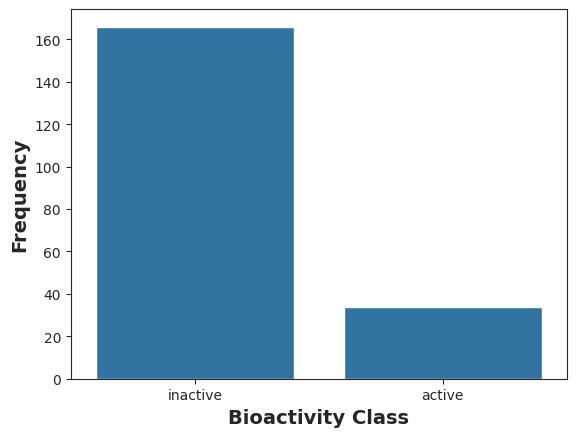

In [27]:
sns.countplot(x='bioactivity_class',data=df_2class)
plt.xlabel("Bioactivity Class",fontsize=14, fontweight='bold')
plt.ylabel("Frequency",fontsize=14, fontweight='bold')
plt.savefig("plot_bioactivity_class.pdf")

Scatter plot of MW vs LogP

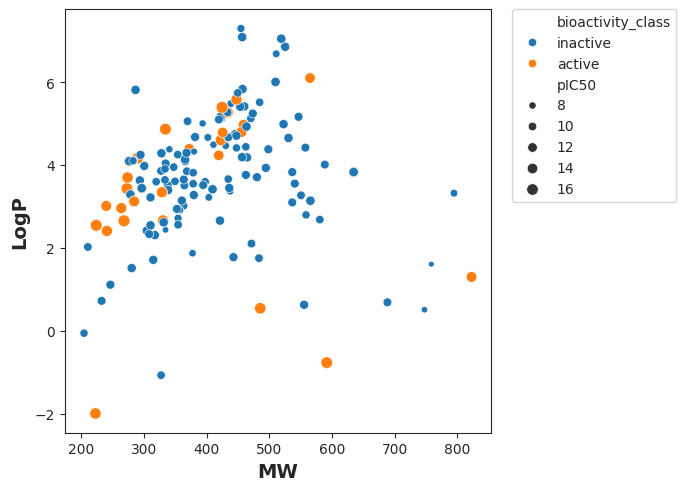

In [28]:
plt.figure(figsize=(5.5,5.5))
sns.scatterplot(x='MW', y='LogP', data=df_2class,hue='bioactivity_class', size = 'pIC50')
plt.xlabel("MW",fontsize=14, fontweight='bold')
plt.ylabel("LogP",fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.savefig("plot_MW_vs_LogP.pdf")

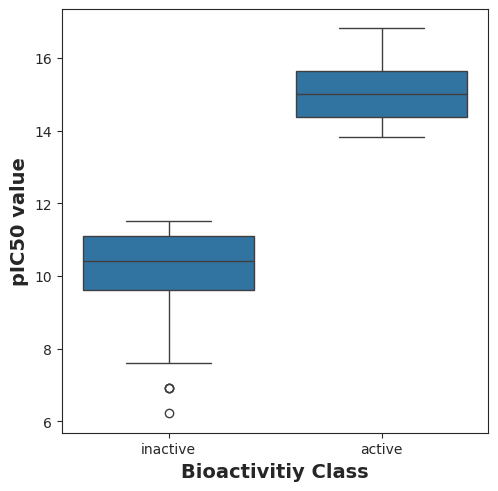

In [29]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class', y='pIC50', data=df_2class)
plt.xlabel("Bioactivitiy Class",fontsize=14, fontweight='bold')
plt.ylabel("pIC50 value",fontsize=14, fontweight='bold')

plt.savefig("pIC50_value.pdf")

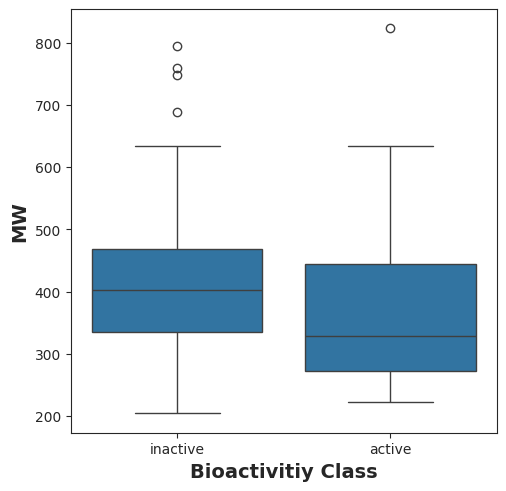

In [30]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class', y='MW', data=df_2class)
plt.xlabel("Bioactivitiy Class",fontsize=14, fontweight='bold')
plt.ylabel("MW",fontsize=14, fontweight='bold')

plt.savefig("plot_MW.pdf")

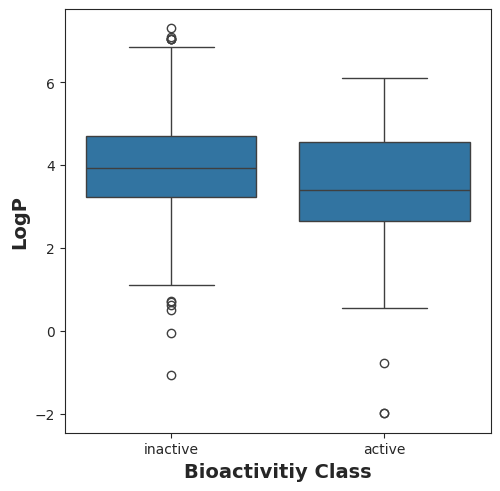

In [32]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class', y='LogP', data=df_2class)
plt.xlabel("Bioactivitiy Class",fontsize=14, fontweight='bold')
plt.ylabel("LogP",fontsize=14, fontweight='bold')

plt.savefig("plot_LogP.pdf")

In [33]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2025-01-04 12:45:31--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2025-01-04 12:45:32--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   141MB/s    in 0.2s    

2025-01-04 12:45:32 (141 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2025-01-04 12:45:32--  https://github

In [34]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [35]:
! wget https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv

--2025-01-04 12:47:31--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 655414 (640K) [text/plain]
Saving to: ‘acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv’

acetylcholinesteras 100%[===================>] 640.05K  --.-KB/s    in 0.06s   

2025-01-04 12:47:32 (9.75 MB/s) - ‘acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv’ saved [655414/655414]



In [36]:
df3 = pd.read_csv("acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv")

In [37]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,6.124939
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,7.000000
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,4.301030
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,6.522879
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...,...
4690,4690,CHEMBL4293155,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3Cl)CC...,intermediate,511.150,7.07230,2.0,3.0,5.612610
4691,4691,CHEMBL4282558,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc(Cl)c3)...,intermediate,511.150,7.07230,2.0,3.0,5.595166
4692,4692,CHEMBL4281727,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(Br)cc3)...,intermediate,555.601,7.18140,2.0,3.0,5.419075
4693,4693,CHEMBL4292349,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc([N+](=...,intermediate,521.702,6.32710,2.0,5.0,5.460924


In [38]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi',sep='\t',index=False, header=False)


In [39]:
! cat 'molecule.smi' | head -5

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478


In [42]:
! cat 'molecule.smi' | wc -l

4695


In [43]:
! bash padel.sh

Processing CHEMBL133897 in molecule.smi (1/4695). 
Processing CHEMBL336398 in molecule.smi (2/4695). 
Processing CHEMBL131588 in molecule.smi (3/4695). Average speed: 11.65 s/mol.
Processing CHEMBL130628 in molecule.smi (4/4695). Average speed: 5.93 s/mol.
Processing CHEMBL130478 in molecule.smi (5/4695). Average speed: 4.78 s/mol.
Processing CHEMBL130112 in molecule.smi (6/4695). Average speed: 3.68 s/mol.
Processing CHEMBL130098 in molecule.smi (7/4695). Average speed: 3.03 s/mol.
Processing CHEMBL337486 in molecule.smi (8/4695). Average speed: 2.67 s/mol.
Processing CHEMBL336538 in molecule.smi (9/4695). Average speed: 2.33 s/mol.
Processing CHEMBL131051 in molecule.smi (10/4695). Average speed: 2.14 s/mol.
Processing CHEMBL341437 in molecule.smi (11/4695). Average speed: 1.93 s/mol.
Processing CHEMBL335033 in molecule.smi (12/4695). Average speed: 1.85 s/mol.
Processing CHEMBL122983 in molecule.smi (13/4695). Average speed: 1.89 s/mol.
Processing CHEMBL338720 in molecule.smi (14/46

Preparing the X and Y Data matrices

In [58]:
df3_X = pd.read_csv("descriptors_output.csv")
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,CHEMBL4293155,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4691,CHEMBL4282558,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4692,CHEMBL4281727,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4693,CHEMBL4292349,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df3_X= df3_X.drop( columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df3_Y = df3['pIC50']
df3_Y

,pIC50
0,6.124939
1,7.000000
2,4.301030
3,6.522879
4,6.096910
...,...
4690,5.612610
4691,5.595166
4692,5.419075
4693,5.460924


Combining the X and Y Values

In [62]:
dataset3 = pd.concat([df3_X,df3_Y],axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.612610
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.595166
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.419075
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.460924


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor